# MNIST Handwriting Classification
## By Mira Kasari

### All Imports

In [349]:
import gzip
import numpy as np
from matplotlib import pyplot as plt 
import cv2
import random
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pickle

### Read and vectorize the data: 

In [350]:
f = gzip.open('train-images-idx3-ubyte.gz','r')
f.read(16)
bufX = f.read(28 * 28 * 60000)
X_train = np.frombuffer(bufX, dtype=np.uint8).astype(np.float32)
X_train = X_train.reshape(60000, 28 * 28)
X_train.shape

(60000, 784)

In [351]:
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
bufY = f.read(28 * 28 * 60000)
y_train = np.frombuffer(bufY, dtype=np.uint8).astype(np.float32)
#X_train2 = X_train2.reshape(60000, 28 * 28)
y_train.shape

(60000,)

In [352]:
f = gzip.open('t10k-images-idx3-ubyte.gz','r')
f.read(16)
bufXtest = f.read(28 * 28 * 60000)
X_test = np.frombuffer(bufXtest, dtype=np.uint8).astype(np.float32)
X_test = x_test.reshape(10000, 28 * 28)
X_test.shape

(10000, 784)

In [353]:
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8)
bufYtest = f.read(28 * 28 * 60000)
y_test = np.frombuffer(bufYtest, dtype=np.uint8).astype(np.float32)
#y_test = X_train2.reshape(60000, 28 * 28)
y_test.shape

(10000,)

### View the images: 

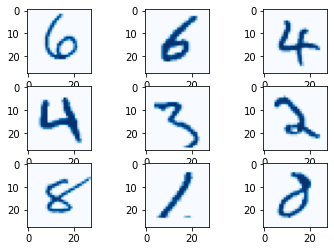

In [354]:
for c in range(1, 10):
    plt.subplot(3, 3,c)
    i = random.randint(0, X_train.data.shape[0])
    im = X_train[i].reshape((28,28))
    plt.imshow(im, cmap='Blues')

### Show distribution of pixels as shown in class: 

High median = 3146, index = 407


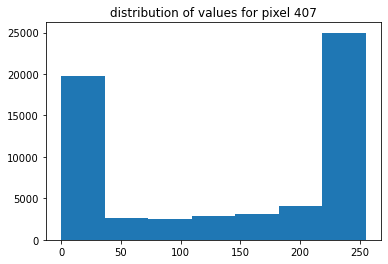

In [355]:
high_med = -1
high_i = -1
for i in range(0,X_train.shape[1]):
    arr = np.histogram(X_train[:,i], bins = np.linspace(0, 255, 8))
    med = np.median(arr[0])
    if med > high_med:
        high_med = med
        high_i = i

print('High median = %i, index = %i' % (high_med, high_i))
plt.hist(X_train[:,high_i], bins = np.linspace(0, 255, 8)) 
plt.title("distribution of values for pixel 407") 
plt.show()

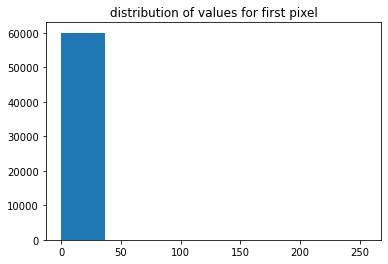

In [356]:
plt.hist(X_train[:,0], bins = np.linspace(0, 255, 8)) 
plt.title("distribution of values for first pixel") 
plt.show()

# Naive Bayes Model

### Train the model

In [357]:
mnb = MultinomialNB()
clf_mnb = mnb.fit(X_train, y_train)

### Run the model on the test data and print accuracy

In [358]:
y_pred = clf_mnb.predict(X_test)
print('AUC: %0.5f' % accuracy_score(y_test, y_pred))

AUC: 0.11810


### Confusion Matrix

In [359]:
confusion_matrix(y_test, y_pred)

array([[   0,  980,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1025,    2,    1,    0,    0,    4,    0,    0,    0],
       [   0, 1008,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0,  977,    1,    0,    0,    0,    2,    1,    0,    1],
       [   0,  888,    0,    0,    0,    3,    1,    0,    0,    0],
       [   0,  946,    0,    0,    0,    0,   12,    0,    0,    0],
       [   0, 1006,    0,    0,    0,    0,    0,   22,    0,    0],
       [   0,  969,    0,    0,    0,    3,    0,    0,    2,    0],
       [   0, 1002,    0,    0,    0,    0,    0,    2,    0,    5]])

In [360]:
from sklearn.metrics import classification_report
print ("Classification Report \n {}".format(classification_report(y_test, y_pred, labels=range(0,10))))

Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.21      1135
           2       0.67      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.50      0.00      0.01       892
           6       0.60      0.01      0.02       958
           7       0.85      0.02      0.04      1028
           8       1.00      0.00      0.00       974
           9       0.83      0.00      0.01      1009

    accuracy                           0.12     10000
   macro avg       0.46      0.10      0.03     10000
weighted avg       0.45      0.12      0.03     10000



/Users/mirakasari/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mirakasari/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mirakasari/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression Model - same parameters used in class

### Train the model

In [361]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(
penalty="l2",
class_weight="balanced",
#random_state=0,
solver="lbfgs",
multi_class="multinomial",
max_iter=500)

clf_lr = lr.fit(X_train, y_train)

/Users/mirakasari/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Run the model on the test data

In [362]:
y_pred = clf_lr.predict(X_test)
print('AUC: %0.5f' % accuracy_score(y_test, y_pred))

AUC: 0.12150


### Confusion Matrix

In [363]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[   0,  980,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1023,    3,    0,    0,    1,    4,    1,    0,    0],
       [   0, 1004,    0,    3,    0,    1,    1,    1,    0,    0],
       [   0,  972,    1,    0,    0,    1,    4,    4,    0,    0],
       [   0,  872,    0,    1,    3,    4,    6,    4,    2,    0],
       [   3,  927,    1,    0,    1,    4,   22,    0,    0,    0],
       [   0,  982,    1,    0,    1,    0,    0,   44,    0,    0],
       [   0,  959,    0,    0,    0,    3,    7,    5,    0,    0],
       [   0,  995,    0,    1,    0,    1,    0,    8,    0,    4]])

# Logistic Regression - parameters that I decided on
Parameters included: 
- tolerance = 1
- max iterations was same as used in class but I tested different values for this parameter
- scaled data using sklearn preprocessing package

### Scale the data

In [364]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
x_test = scaler.transform(x_test)

### Train the model

In [365]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(
penalty="l2",
class_weight="balanced",
random_state=0,
solver="lbfgs",
multi_class="multinomial",
max_iter=500, 
tol = 1)

clf_lr = lr.fit(X_train, y_train)

### Run the model on the test data

In [366]:
y_pred = clf_lr.predict(X_test)
print('AUC: %0.5f' % accuracy_score(y_test, y_pred))

AUC: 0.10000


### Confusion Matrix 

In [367]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[   0,    2,    0,    0,    0,  977,    0,    1,    0,    0],
       [   0,    2,    0,    0,    0, 1133,    0,    0,    0,    0],
       [   2,   39,    4,    0,    0,  980,    1,    6,    0,    0],
       [   0,   31,    1,    0,    1,  956,    0,   21,    0,    0],
       [   0,    6,    2,    0,    0,  968,    0,    6,    0,    0],
       [   0,    1,    1,    0,    1,  888,    0,    1,    0,    0],
       [   2,   62,    7,    0,    0,  884,    2,    1,    0,    0],
       [   1,    8,    0,    0,    3,  913,    0,  103,    0,    0],
       [   0,    2,    0,    0,    0,  971,    0,    1,    0,    0],
       [   0,    3,    0,    0,    2,  999,    0,    4,    0,    1]])

In [368]:
from sklearn.metrics import classification_report
print ("Classification Report \n {}".format(classification_report(y_test, y_pred, labels=range(0,10))))

Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.01      0.00      0.00      1135
           2       0.27      0.00      0.01      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.09      1.00      0.17       892
           6       0.67      0.00      0.00       958
           7       0.72      0.10      0.18      1028
           8       0.00      0.00      0.00       974
           9       1.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.28      0.11      0.04     10000
weighted avg       0.28      0.10      0.03     10000



/Users/mirakasari/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mirakasari/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mirakasari/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Parameters that I tested and their results
- class parameters; max iterations = 500; tolerance 1e-4; no scale --> convergence warning
- class parameters; max iterations = 1000; tolerance 1e-4; no scale --> convergence warning
- class parameters; max iterations = 1000; tolerance 1e-4; scaled --> AUC: 0.83730
- class parameters; max iterations = 500; tolerance 1e-4; scaled --> convergence warning
- class parameters; max iterations = 500; tolerance 0.01; scaled --> convergence warning
- class parameters; max iterations = 500; tolerance 1; scaled --> AUC: 0.83710
- class parameters; max iterations = 500; tolerance 1; scaled --> AUC: 0.83710
- no parameters; max its = 500; tolerance 1; scaled --> AUC: 0.83770 

In [369]:
mnb_model_path = 'MNB_model.pkl'
pickle.dump(mnb, open(mnb_model_path, 'wb'))

In [370]:
lr_model_path = 'LR_model.pkl'
pickle.dump(lr, open(lr_model_path, 'wb'))

In [371]:
with open(mnb_model_path, 'rb') as f:
    mnb_data = pickle.load(f)

In [372]:
with open(lr_model_path, 'rb') as f:
    lr_data = pickle.load(f)